## Class Notes for 2/19/26 ##

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Make and Organize the data ##

In [116]:
xvalues1st = np.random.uniform(low=-2.0, high=2, size=50)
yvalues = - xvalues1st**3 + 2* xvalues1st**2 - 3 *xvalues1st + 3 

In [117]:
xvalues1st.shape

(50,)

In [118]:
xvalues = xvalues1st.reshape(-1,1) # reshape from (300,) to (300,1) to keep the model below happy

In [119]:
xvalues.shape

(50, 1)

In [120]:
xvalues[:5,:].dtype

dtype('float64')

In [121]:
yvalues.shape

(50,)

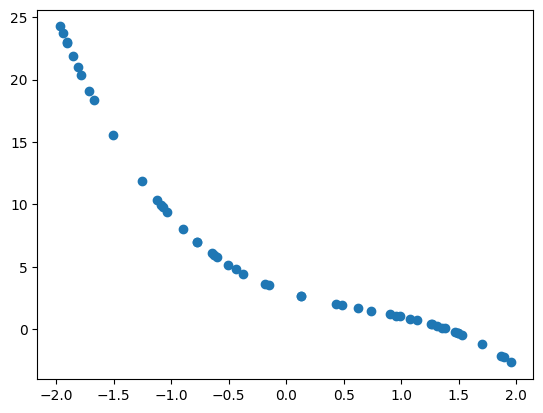

In [122]:
plt.scatter(xvalues1st,yvalues)

In [123]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    xvalues, yvalues, test_size=.2, random_state=1)

## Build the Model ##

In [124]:
#
# Create a python iterable to feed into the model for training
#
import torch
from torch.utils.data import TensorDataset  # creates a dataset from tensors
from torch.utils.data import DataLoader

X_ttrain = torch.from_numpy(X_train).float() 
y_ttrain = torch.from_numpy(y_train).float()
X_ttest = torch.from_numpy(X_test).float() 
y_ttest = torch.from_numpy(y_test).float()

train_ds = TensorDataset(X_ttrain, y_ttrain)  # create the dataset

torch.manual_seed(1)
batch_size = 10
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [125]:
import torch.nn as nn
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  # Google 'list of pytorch layers'
        self.layer2 = nn.Linear(hidden_size,hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)  # Google 'list of pytorch activation functions'
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        return x
    
input_size = X_ttrain.shape[1]
hidden_size = 16
output_size = 1
 
model = Model(input_size, hidden_size, output_size)
model = model

learning_rate = 0.001

loss_fn = nn.MSELoss()  # Google 'list of loss functions'
 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # Google 'pytorch list of optimizers'


In [128]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

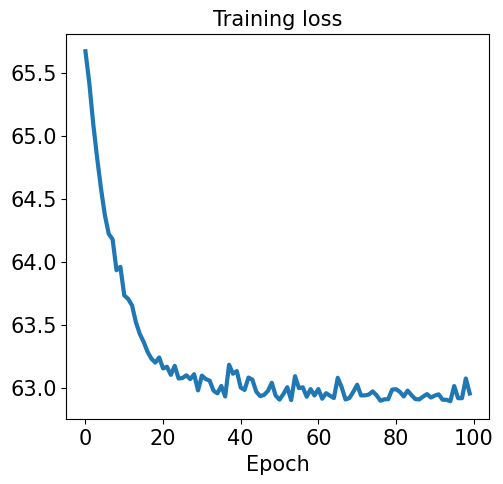

In [129]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

 
plt.show()

### Evaluating the trained model on the test dataset

In [132]:
pred_test = model(X_ttest)
loss_pred = loss_fn(pred_test, y_ttest)
print(loss_pred)


tensor(72.0460, grad_fn=<MseLossBackward0>)


In [135]:
myxs = np.linspace(-2,2,20)

In [139]:
myxs.reshape(-1,1)
myxtensors = torch.from_numpy(myxs.reshape(-1,1)).float() 

In [144]:
myxtensors.T

tensor([[-2.0000, -1.7895, -1.5789, -1.3684, -1.1579, -0.9474, -0.7368, -0.5263,
         -0.3158, -0.1053,  0.1053,  0.3158,  0.5263,  0.7368,  0.9474,  1.1579,
          1.3684,  1.5789,  1.7895,  2.0000]])

In [143]:
myytensors = model(myxtensors)

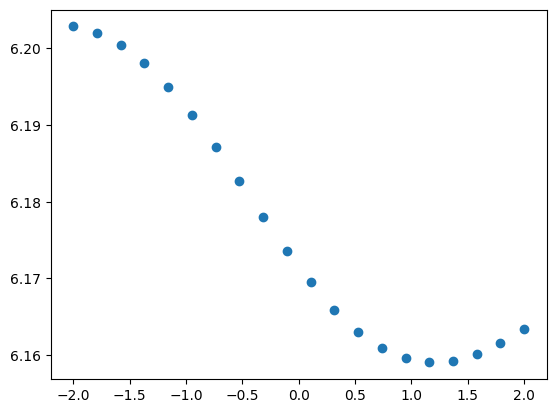

In [147]:
plt.scatter(myxtensors.T.numpy(), myytensors.T.detach().numpy())

##  Train a network on 2-dimensional Data ##

Create a neural network to classify the 1000-point 2-dimensional data in the file classproblem2.csv on the class Github in the Classdata.  In this case, you will want to create a train-test-validation split and test the accuracy (epoch by epoch as is usually done for training neural networks) **and** plot your test results using a the hue of the dot to distinguish the two categories.  Does it look like the plot of the original data?  (**Note:** You saw this data set in the classification problems assignment.) 

+ What loss function will you use?
+ What measure(s) will you have for the accuracy of your results?

## Make a Classifier for the SKLearn Digits Dataset ##

You made an SVM classifier for two digits in the SKLearn Digits Dataset in a previous assignment.  Now make a neural network classifier *for the entire dataset*, including all digits 0, ..., 9.  Some things to think about:

+ Remember that you will need to make a train-test-validation split
+ You will want to use Pytorch's cross entropy loss
+ As in the textbook, produce a visualization of some examples where you classifier fails.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

/opt/jupyterhub/jupyter_env/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
digits = load_digits()
print(digits.data.shape)
(1797, 64)



(1797, 64)


(1797, 64)

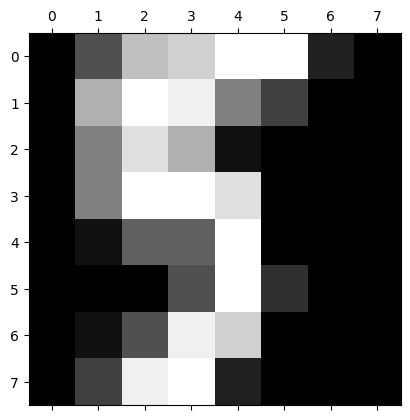

In [3]:
plt.matshow(digits.images[15], cmap="gray")

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [7]:
myX = digits.data
myy = digits.target